In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [0]:
rdata=pd.read_csv('/content/drive/My Drive/Bulldozer Data/bluebook-for-bulldozers/Train/Train.csv', low_memory=False, parse_dates=['saledate'] )

In [4]:
rdata.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

In [0]:
data1=rdata.copy()

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

In [0]:
def assigncat(data,column):
  list1=[]
  for i in data[column].unique():
    list1.append(i)
  try:
    list1.remove(np.nan)
  except Exception as e:
    pass

  data[column+'_New']=pd.Categorical(data[column],categories=list1,ordered=True).codes
  data.drop(f'{column}', axis=1, inplace=True)
  data.replace(-1,np.nan,inplace=True)




In [0]:
for i in data1.columns:
  if data1[i].dtype=='O':
    try:
      assigncat(data1,i)
    except Exception as e:
      pass


In [0]:
data1['saleyear']=data1['saledate'].dt.year
data1.drop('saledate', axis=1,inplace=True)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                        401125 non-null int64
SalePrice                      401125 non-null int64
MachineID                      401125 non-null int64
ModelID                        401125 non-null int64
datasource                     401125 non-null int64
auctioneerID                   380989 non-null float64
YearMade                       401125 non-null int64
MachineHoursCurrentMeter       142765 non-null float64
UsageBand_New                  69639 non-null float64
fiModelDesc_New                401125 non-null int16
fiBaseModel_New                401125 non-null int16
fiSecondaryDesc_New            263934 non-null float64
fiModelSeries_New              56908 non-null float64
fiModelDescriptor_New          71919 non-null float64
ProductSize_New                190350 non-null float64
fiProductClassDesc_New         401125 non-null int8
state_New                      

In [11]:
data1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand_New,fiModelDesc_New,fiBaseModel_New,fiSecondaryDesc_New,fiModelSeries_New,fiModelDescriptor_New,ProductSize_New,fiProductClassDesc_New,state_New,ProductGroup_New,ProductGroupDesc_New,Drive_System_New,Enclosure_New,Forks_New,Pad_Type_New,Ride_Control_New,Stick_New,Transmission_New,Turbocharged_New,Blade_Extension_New,Blade_Width_New,Enclosure_Type_New,Engine_Horsepower_New,Hydraulics_New,Pushblock_New,Ripper_New,Scarifier_New,Tip_Control_New,Tire_Size_New,Coupler_New,Coupler_System_New,Grouser_Tracks_New,Hydraulics_Flow_New,Track_Type_New,Undercarriage_Pad_Width_New,Stick_Length_New,Thumb_New,Pattern_Changer_New,Grouser_Type_New,Backhoe_Mounting_New,Blade_Type_New,Travel_Controls_New,Differential_Type_New,Steering_Controls_New,saleyear
0,1139246,66000,999089,3157,121,3.0,2004,68.0,0.0,0,0,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2006
1,1139248,57000,117657,77,121,3.0,1996,4640.0,0.0,1,1,1.0,0.0,NaN,0.0,1,1,0,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2004
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,1.0,2,2,NaN,NaN,NaN,NaN,2,2,1,1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,1.0,3,3,NaN,1.0,NaN,1.0,3,3,2,2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,2.0,4,4,NaN,NaN,NaN,NaN,4,2,1,1,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [0]:
for i in data1.columns:
  data1[i]=data1[i].fillna(data1[i].median())

In [0]:
X=data1.drop('SalePrice', axis=1)
Y=np.log(data1.SalePrice)

In [22]:
forr=RandomForestRegressor(n_jobs=-1)
forr.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
forr.score(X,Y)

0.9871588993242172

In [0]:
def split_val(a,n): return a[:n].copy(), a[n:].copy() 

In [15]:
n_valid=12000
n_trn=len(X)-n_valid
raw_train, raw_valid=split_val(data1,n_trn)
X_train,X_valid=split_val(X,n_trn)
Y_train,Y_valid=split_val(Y,n_trn)

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((389125, 52), (389125,), (12000, 52), (12000,))

In [0]:
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython import display
from io import StringIO
from math import *
import re

In [0]:
def RMS(x,y): return sqrt(((x-y)**2).mean())

In [0]:
def print_score(m):
  res=[RMS(m.predict(X_train),Y_train), RMS(m.predict(X_valid),Y_valid),m.score(X_train,Y_train),m.score(X_valid,Y_valid)]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [44]:
m=RandomForestRegressor(n_estimators=1,max_depth=3,bootstrap=False, n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[0.5513536884318424, 0.5727537785897336, 0.3646758053798844, 0.4141534186104713]


In [0]:
import graphviz
import IPython

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                     special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
      f'Tree {{ size={size}; ratio={ratio}', s)))

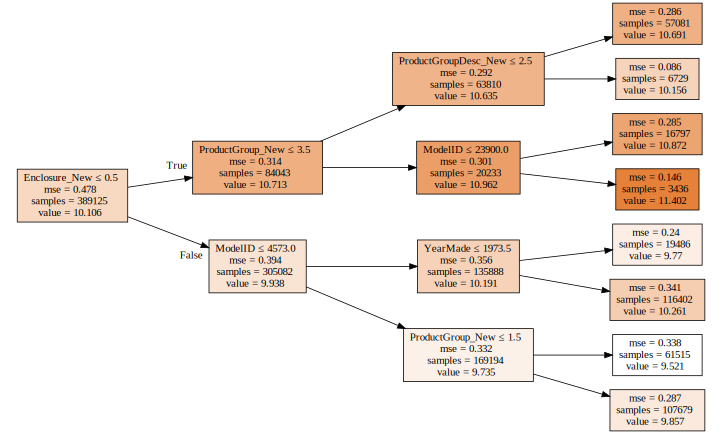

In [47]:
draw_tree(m.estimators_[0], X, precision=3)

In [0]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)